# Reconstructing the tropical Pacific SST with PAGES2k

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

In [2]:
job = cfr.ReconJob()
job.load_proxydb('PAGES2kv2')

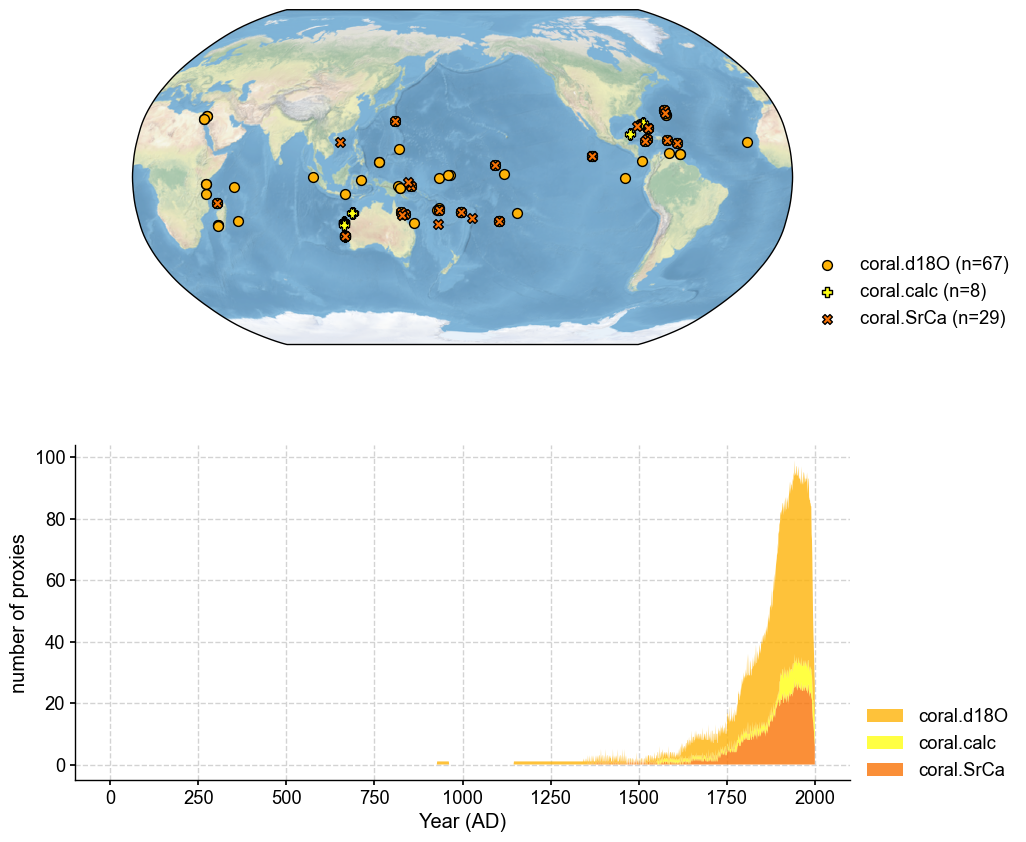

In [3]:
job.filter_proxydb(by='ptype', keys=['coral'])
fig, ax = job.proxydb.plot(plot_count=True)

In [4]:
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'], verbose=True)

>>> job.configs["annualize_proxydb_months"] = [12, 1, 2]
>>> job.configs["annualize_proxydb_ptypes"] = ['coral']


Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:02<00:00, 42.77it/s]

>>> 99 records remaining
>>> job.proxydb updated


In [5]:
# job.center_proxydb(verbose=True, ref_period=(1951, 2000))

In [6]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': 'gistemp1200_GHCNv4_ERSSTv5',
    },
    rename_dict={'tas': 'tempanomaly'},
    anom_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': 'gistemp1200_GHCNv4_ERSSTv5'}
>>> job.configs["obs_rename_dict"] = {'tas': 'tempanomaly'}
>>> job.configs["obs_anom_period"] = [1951, 1980]
>>> job.configs["obs_lat_name"] = lat
>>> job.configs["obs_lon_name"] = lon
>>> job.configs["obs_time_name"] = time
>>> The target file seems existed at: ./data/gistemp1200_GHCNv4_ERSSTv5.nc.gz . Loading from it instead of downloading ...
>>> obs variables ['tas'] loaded
>>> job.obs created


>>> job.configs["obs_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.obs updated
>>> job.configs["obs_regrid_nlat"] = 42
>>> job.configs["obs_regrid_nlon"] = 63
>>> Processing tas ...
>>> job.configs["obs_lat_min"] = -20
>>> job.configs["obs_lat_max"] = 20
>>> job.configs["obs_lon_min"] = 150
>>> job.configs["obs_lon_max"] = 260
>>> Processing tas ...


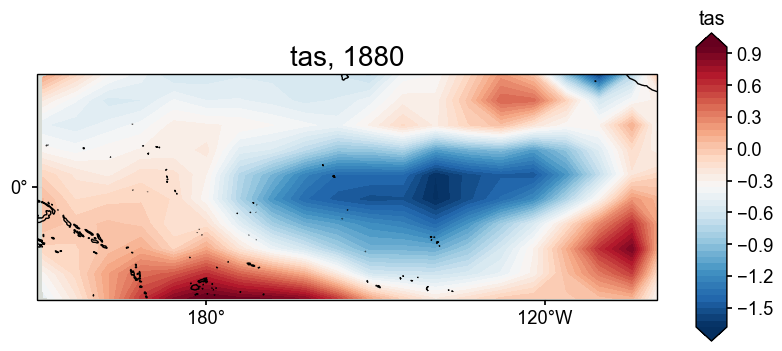

In [7]:
job.annualize_clim(tag='obs', months=[12, 1, 2], verbose=True)
job.regrid_clim(tag='obs', nlat=42, nlon=63, verbose=True)
job.crop_clim(tag='obs', lat_min=-20, lat_max=20, lon_min=150, lon_max=260, verbose=True)

fig, ax = job.obs['tas'][0].plot(
    projection='PlateCarree',
    latlon_range=(-20, 20, 150, 260),
)

In [8]:
job.prep_graphem(
    recon_period=(1871, 2000),  # period to reconstruct
    calib_period=(1901, 2000),  # period for calibration
    verbose=True,
)

>>> job.configs["recon_period"] = [1871, 2000]
>>> job.configs["recon_timescale"] = 1
>>> job.configs["calib_period"] = [1901, 2000]
>>> job.graphem_params["recon_time"] created
>>> job.graphem_params["calib_time"] created
>>> job.graphem_params["field_obs"] created
>>> job.graphem_params["calib_idx"] created
>>> job.graphem_params["field"] created
>>> job.graphem_params["df_proxy"] created
>>> job.graphem_params["proxy"] created
>>> job.graphem_params["lonlat"] created


In [9]:
%%time

job.run_graphem(
    save_dirpath='./recons/graphem-real-pages2k-no-centering',
    graph_method='neighborhood',
    cutoff_radius=1500,
    verbose=True,
)

>>> job.configs["compress_params"] = {'zlib': True}
>>> job.configs["save_dirpath"] = ./recons/graphem-real-pages2k-no-centering
>>> job.configs["save_filename"] = job_r01_recon.nc
>>> job.configs["graph_method"] = neighborhood
>>> job.configs["cutoff_radius"] = 1500
Computing a neighborhood graph with R = 1500.0 km
Estimating graph using neighborhood method
Running GraphEM:



EM | dXmis: 0.2318; rdXmis: nan:   0%|          | 1/200 [00:35<1:57:25, 35.40s/it]

GraphEM.EM(): Tolerance achieved.
job.graphem_solver created and saved to: None
>>> job.recon_fields created
>>> Reconstructed fields saved to: ./recons/graphem-real-pages2k-no-centering/job_r01_recon.nc
CPU times: user 3min 48s, sys: 2min 58s, total: 6min 46s
Wall time: 35.8 s


In [10]:
res = cfr.ReconRes('./recons/graphem-real-pages2k-no-centering')
res.load(['nino3.4', 'tas'], verbose=True)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created


In [11]:
target = cfr.ClimateField().fetch('20CRv3/tas', vn='air').rename('tas').get_anom((1951, 1980))

>>> The target file seems existed at: ./data/air.2m.mon.mean.nc . Loading from it instead of downloading ...


In [12]:
target = target.annualize(months=[12, 1, 2]).crop(lat_min=-20, lat_max=20, lon_min=150, lon_max=260)
target.da

<xarray.DataArray 'tas' (time: 181, lat: 41, lon: 111)>
array([[[-2.83523560e-01, -2.68692017e-01, -2.43392944e-01, ...,
         -1.33480835e+00, -1.30511475e+00, -1.26730347e+00],
        [-2.16659546e-01, -2.03414917e-01, -1.80007935e-01, ...,
         -1.36550903e+00, -1.32505798e+00, -1.27780151e+00],
        [-1.67251587e-01, -1.53961182e-01, -1.41983032e-01, ...,
         -1.35557556e+00, -1.31358337e+00, -1.26602173e+00],
        ...,
        [ 1.02203369e-01,  7.09075928e-02,  5.17883301e-02, ...,
         -5.47439575e-01, -5.60302734e-01, -5.94635010e-01],
        [ 1.37039185e-01,  1.04782104e-01,  8.49151611e-02, ...,
         -5.06057739e-01, -5.52276611e-01, -5.81237793e-01],
        [ 1.11831665e-01,  1.02218628e-01,  9.32769775e-02, ...,
         -6.34521484e-01, -7.08770752e-01, -8.07388306e-01]],

       [[-2.76224762e-01, -2.39176437e-01, -1.96207687e-01, ...,
         -1.37163293e+00, -1.34065759e+00, -1.31070960e+00],
        [-1.93786621e-01, -1.54327393e-01, -1.05845131e-01, ...,
         -1.42887366e+00, -1.38025916e+00, -1.34369910e+00],
        [-9.95686874e-02, -6.37105331e-02, -3.74450684e-02, ...,
         -1.41455078e+00, -1.37779748e+00, -1.34026086e+00],
...
          1.17316687e+00,  1.13375854e+00,  1.03501379e+00],
        [ 1.26983643e-01,  1.20930992e-01,  1.22894287e-01, ...,
          1.16903687e+00,  1.28177893e+00,  1.17943323e+00],
        [ 2.57364903e-02,  2.13623047e-04, -5.79833984e-04, ...,
          8.59792054e-01,  7.59307861e-01,  4.87772614e-01]],

       [[ 2.66143799e-01,  2.72674561e-01,  2.41973877e-01, ...,
         -3.20739746e-02, -5.53588867e-02, -8.41064453e-02],
        [ 2.42736816e-01,  2.02178955e-01,  2.22076416e-01, ...,
          4.38842773e-02,  1.73339844e-02, -1.15966797e-03],
        [ 2.12402344e-01,  2.41149902e-01,  2.97912598e-01, ...,
          9.70764160e-02,  8.13598633e-02,  7.81250000e-02],
        ...,
        [ 3.69049072e-01,  3.32550049e-01,  3.28521729e-01, ...,
          1.31185913e+00,  1.37796021e+00,  1.51620483e+00],
        [ 4.17053223e-01,  3.77380371e-01,  3.73504639e-01, ...,
          1.36755371e+00,  1.58401489e+00,  1.65634155e+00],
        [ 5.11260986e-01,  4.51843262e-01,  4.37530518e-01, ...,
          1.45657349e+00,  1.46759033e+00,  1.60684204e+00]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -20.0 -19.0 -18.0 -17.0 -16.0 ... 17.0 18.0 19.0 20.0
  * lon      (lon) float32 150.0 151.0 152.0 153.0 ... 257.0 258.0 259.0 260.0
  * time     (time) int64 1836 1837 1838 1839 1840 ... 2012 2013 2014 2015 2016
Attributes:
    annualized:  1

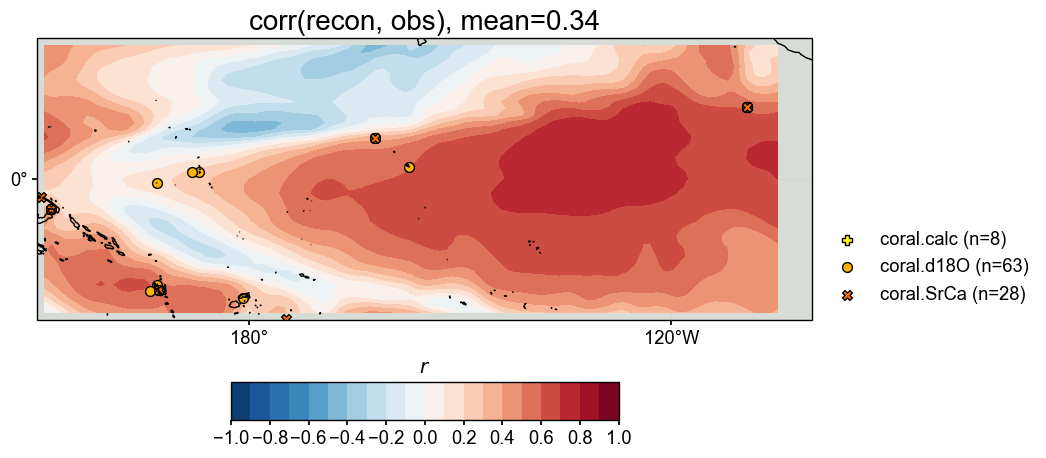

Figure saved at: "figs/graphem_corr_recon_obs.pdf"


In [13]:
# validate the reconstruction against 20CR
stat = 'corr'

valid_fd = res.recons['tas'].compare(
    target, stat=stat,
    timespan=(1874, 1900),
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(recon, obs), mean={valid_fd.geo_mean().value[0,0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-20, 20, 150, 260),
    plot_cbar=True,
    plot_proxydb=True, proxydb=job.proxydb,
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/graphem_{stat}_recon_obs.pdf')

In [14]:
bc09 = cfr.EnsTS().fetch('BC09_NINO34')
bc09_ann = bc09.annualize(months=[12, 1, 2])

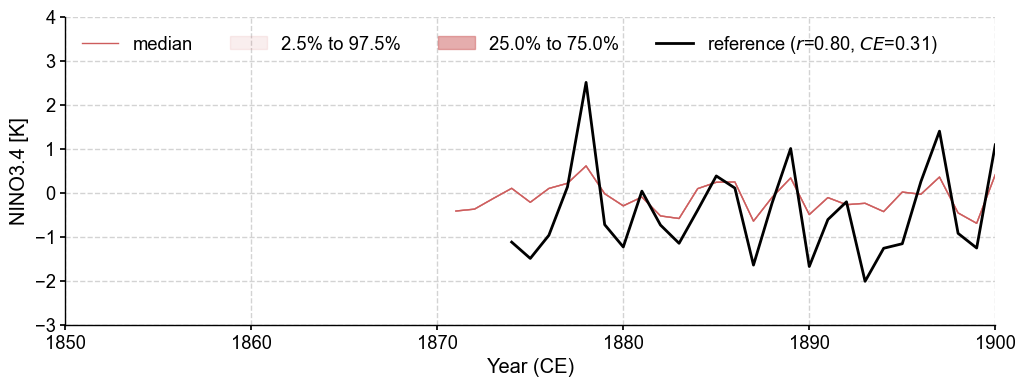

Figure saved at: "figs/graphem_corr_recon_BC09.pdf"


In [15]:
fig, ax = res.recons['nino3.4'].compare(bc09_ann, timespan=(1874, 1900)).plot_qs()
ax.set_xlim(1850, 1900)
ax.set_ylim(-3, 4)
ax.set_ylabel('NINO3.4 [K]')
cfr.showfig(fig)
cfr.savefig(fig, f'./figs/graphem_corr_recon_BC09.pdf')

In [ ]:
inst = job.graphem_params['calib_idx']
G_L = cfr.graphem.Graph(
    lonlat = job.graphem_params['lonlat'],
    field = job.graphem_solver.field_r[inst],
    proxy = job.graphem_params['proxy'][inst,:])

G_L.glasso_adj(target_FF=3,target_FP=4)

In [ ]:
job.graphem_params['proxy'][inst, :].shape

In [ ]:
job.graphem_params['lonlat'].shape